**Nama Peserta:**

* Ammar Ridwan Darma 
* Alif Adwitiya Pratama
* Nur Imam Masri

**Universitas Host:**

Universitas Gajah Mada


**Kelas:**

UGM-01


**Kelompok:** 1


**Tema Project Kelompok:**  

Iklim Cuaca

# **import libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# import Library SelectKBest
from sklearn.feature_selection import SelectKBest

# import Library chi kuadrat/squared
from sklearn.feature_selection import chi2

In [ ]:
plt.style.use('seaborn')

# **Data Loading**


[Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2018](https://data.jakarta.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2018)

[Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2017](https://data.jakarta.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2017)


### **Attribute Information**

Dataset ini berisi Prakiraan Cuaca di Wilayah Provinsi DKI Jakarta tiap bulannya pada Tahun 2018.

Penjelasan mengenai variabel pada dataset ini :

1. tanggal.
2. wilayah
3. waktu.
4. cuaca
5. kelembaban_persen,
6. suhu_derajat_celcius

**Metadata :**

* Terakhir Diperbarui : 21 Januari 2019
* Dibuat : 30 Januari 2018
* Sumber : BPBD DKI Jakarta
* Frekuensi Penerbitan : 1 Bulan Sekali
* Tahun : 2018
* Cakupan : Provinsi
* Penyajian : Wilayah
* Kontak : bpbddki@jakarta.go.id 021-3521623

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/Shareddrives/Microcredential data team 1"

/content/drive/Shareddrives/Microcredential data team 1


In [ ]:
# Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2018 dan 2017
df =pd.read_excel('cuaca2017-2018.xlsx', usecols=['tanggal', 'wilayah', 'waktu', 'cuaca',
       'kelembaban_persen', 'suhu_derajat_celcius', 'BanyakKotaRawan'])
df.head(5)

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,BanyakKotaRawan
0,2017-01-03,Jakarta Pusat,Pagi,Hujan Ringan,65 - 95,22 - 31,2
1,2017-01-03,Kepulauan Seribu,Malam,Hujan Ringan,65 - 95,22 - 31,0
2,2017-01-03,Jakarta Timur,Malam,Hujan Ringan,65 - 95,22 - 31,23
3,2017-01-03,Jakarta Barat,Malam,Hujan Ringan,65 - 95,22 - 31,17
4,2017-01-03,Jakarta Selatan,Malam,Hujan Ringan,65 - 95,22 - 31,25


Ada 14652 baris data yang berarti ada 14652 cuaca tiap saat

7 kolom yang berarti 7 columns (Features)

In [ ]:
# the shape of data
print('Total Row:', df.shape[0])
print('Total Columns:', df.shape[1])
df.shape

Total Row: 14652
Total Columns: 7


(14652, 7)

In [ ]:
# get the columns
df.columns

Index(['tanggal', 'wilayah', 'waktu', 'cuaca', 'kelembaban_persen',
       'suhu_derajat_celcius', 'BanyakKotaRawan'],
      dtype='object')

## **Wilayah**

**Daftar Tiap Wilayah di Provinsi DKI Jakarta**

In [ ]:
np.unique(df['wilayah'])

array(['Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan',
       'Jakarta Timur', 'Jakarta Utara', 'Kepulauan Seribu'], dtype=object)

## **Cuaca**

**Daftar Cuaca Tiap Wilayah di Provinsi DKI Jakarta**

In [ ]:
np.unique(df['cuaca'])

array(['Beawan', 'Berawa', 'Berawan', 'Berawan Sedang', 'Berawan Teba',
       'Berawan Tebal', 'Berawan tebal', 'Cerah', 'Cerah Berawah',
       'Cerah Berawan', 'Cerah Berawn', 'Cerah berawan', 'Cerang Berawan',
       'Hujan', 'Hujan Loka', 'Hujan Lokal', 'Hujan Petir',
       'Hujan RIngan', 'Hujan Ringan', 'Hujan Ringanl', 'Hujan Sedang',
       'Hujang Sedang', 'Udara Kabur'], dtype=object)

In [ ]:
df[(df['cuaca']=="Beawan") | (df['cuaca']=="Berawa")] = "Berawan"
df[(df['cuaca']=="Berawan Teba") | (df['cuaca']=="Berawan tebal")] = "Berawan Tebal"
df[
   (df['cuaca']=="Cerang Berawah") | 
   (df['cuaca']=="Cerah Berawn") | 
   (df['cuaca']=="Cerah berawan") |
   (df['cuaca']=="Cerah Berawah") | 
   (df['cuaca']=="Cerang Berawan")
   ] = "Cerah Berawan"

df[(df['cuaca']=="Hujan Loka")] = "Hujan Lokal"
df[(df['cuaca']=="Hujan RIngan") | (df['cuaca']=="Hujan Ringanl")] = "Hujan Ringan"
df[(df['cuaca']=="Hujang Sedang")] = "Hujan Sedang"

In [ ]:
np.unique(df['cuaca'])

array(['Berawan', 'Berawan Sedang', 'Berawan Tebal', 'Cerah',
       'Cerah Berawan', 'Hujan', 'Hujan Lokal', 'Hujan Petir',
       'Hujan Ringan', 'Hujan Sedang', 'Udara Kabur'], dtype=object)

## **Persen Kelembapan**

**Daftar Persen Kelembapan Tiap Wilayah di Provinsi DKI Jakarta**

In [ ]:
np.unique(df['kelembaban_persen'])

array(['35 – 75', '35 – 80', '40 - 70', '40 – 75', '40 – 80', '40 – 85',
       '40 – 90', '40 – 95', '45 - 80', '45 – 75', '45 – 80', '45 – 85',
       '45 – 90', '50 - 75', '50 - 80', '50 - 92', '50 – 80', '50 – 85',
       '50 – 90', '50 – 95', '55 - 100', '55 - 75', '55 - 80', '55 - 85',
       '55 - 90', '55 - 95', '55 – 80', '55 – 85', '55 – 90', '55 – 95',
       '55-85%', '60 - 100', '60 - 80', '60 - 85', '60 - 90', '60 - 95',
       '60 – 100', '60 – 80', '60 – 85', '60 – 90', '60 – 95', '60-90%',
       '60-95%', '65 - 100', '65 - 80', '65 - 85', '65 - 90', '65 - 95',
       '65 - 97', '65 – 100', '65 – 85', '65 – 90', '65 – 95', '65-100%',
       '65-90%', '65-95%', '70 - 100', '70 - 85', '70 - 90', '70 - 95',
       '70 – 100', '70 – 80', '70 – 90', '70 – 95', '70-95%', '75 - 100',
       '75 - 85', '75 - 90', '75 - 95', '75 – 100', '75 – 95', '75-90%',
       '75-95%', '80 - 100', '80 - 90', '80 - 95', '80 – 100', '80 – 95',
       '80-100%', '80-95%', '85 - 100', '85 - 90

In [ ]:
selection = df['kelembaban_persen'].str.contains('%', regex=True)
df.loc[selection, 'kelembaban_persen'] = df.loc[selection, 'kelembaban_persen'].map(lambda x: x.replace("%", ""))

In [ ]:
selection02 = df['kelembaban_persen'].str.contains(' – ', regex=True)
df.loc[selection02, 'kelembaban_persen'] = df.loc[selection02, 'kelembaban_persen'].map(lambda x: x.replace(" – ", "-"))

In [ ]:
selection03 = df['kelembaban_persen'].str.contains(' - ', regex=True)
df.loc[selection03, 'kelembaban_persen'] = df.loc[selection03, 'kelembaban_persen'].map(lambda x: x.replace(" - ", "-"))

In [ ]:
np.unique(df['kelembaban_persen'])

array(['35-75', '35-80', '40-70', '40-75', '40-80', '40-85', '40-90',
       '40-95', '45-75', '45-80', '45-85', '45-90', '50-75', '50-80',
       '50-85', '50-90', '50-92', '50-95', '55-100', '55-75', '55-80',
       '55-85', '55-90', '55-95', '60-100', '60-80', '60-85', '60-90',
       '60-95', '65-100', '65-80', '65-85', '65-90', '65-95', '65-97',
       '70-100', '70-80', '70-85', '70-90', '70-95', '75-100', '75-85',
       '75-90', '75-95', '80-100', '80-90', '80-95', '85-100', '85-90',
       '85-95', '90-95', '95-95', 'Berawan', 'Berawan Tebal',
       'Cerah Berawan', 'Hujan Lokal', 'Hujan Ringan', 'Hujan Sedang'],
      dtype=object)

In [ ]:
trash = ['Berawan', 'Berawan Tebal', 'Cerah Berawan', 'Hujan Lokal', 'Hujan Ringan', 'Hujan Sedang']
for x in trash :
  df.drop(df.loc[df['kelembaban_persen']==x].index, inplace=True)

In [ ]:
np.unique(df['kelembaban_persen'])

array(['35-75', '35-80', '40-70', '40-75', '40-80', '40-85', '40-90',
       '40-95', '45-75', '45-80', '45-85', '45-90', '50-75', '50-80',
       '50-85', '50-90', '50-92', '50-95', '55-100', '55-75', '55-80',
       '55-85', '55-90', '55-95', '60-100', '60-80', '60-85', '60-90',
       '60-95', '65-100', '65-80', '65-85', '65-90', '65-95', '65-97',
       '70-100', '70-80', '70-85', '70-90', '70-95', '75-100', '75-85',
       '75-90', '75-95', '80-100', '80-90', '80-95', '85-100', '85-90',
       '85-95', '90-95', '95-95'], dtype=object)

## **Suhu Derajat Celcius**

**Daftar Suhu Derajat Celcius Tiap Wilayah di Provinsi DKI Jakarta**

In [ ]:
np.unique(df['suhu_derajat_celcius'])

array(['20 – 34', '21 - 32', '21 - 33', '21 - 34', '21 – 33', '21 – 34',
       '22 - 31', '22 - 32', '22 - 33', '22 – 30', '22 – 32', '22 – 33',
       '22 – 34', '22 – 35', '23 - 31', '23 - 32', '23 - 33', '23 - 34',
       '23 – 28', '23 – 29', '23 – 30', '23 – 31', '23 – 32', '23 – 33',
       '23 – 34', '23 – 35', '23-29°', '23-30°', '23-31°', '23-32°',
       '23-33°', '24 - 28', '24 - 29', '24 - 30', '24 - 31', '24 - 32',
       '24 - 33', '24 - 34', '24 – 28', '24 – 29', '24 – 30', '24 – 31',
       '24 – 32', '24 – 33', '24 – 34', '24 – 35', '24-32°', '24-33°',
       '24-34°', '25 - 31', '25 - 32', '25 - 33', '25 - 34', '25 – 30',
       '25 – 31', '25 – 32', '25 – 33', '25 – 34', '25 – 35', '26 - 32',
       '26 - 33', '26 - 34', '26 – 32', '26 – 33', '27 - 29', '27 - 32'],
      dtype=object)

In [ ]:
selection = df['suhu_derajat_celcius'].str.contains('°', regex=True)
df.loc[selection, 'suhu_derajat_celcius'] = df.loc[selection, 'suhu_derajat_celcius'].map(lambda x: x.replace("°", ""))

In [ ]:
selection02 = df['suhu_derajat_celcius'].str.contains(' – ', regex=True)
df.loc[selection02, 'suhu_derajat_celcius'] = df.loc[selection02, 'suhu_derajat_celcius'].map(lambda x: x.replace(" – ", "-"))

In [ ]:
selection03 = df['suhu_derajat_celcius'].str.contains(' - ', regex=True)
df.loc[selection03, 'suhu_derajat_celcius'] = df.loc[selection03, 'suhu_derajat_celcius'].map(lambda x: x.replace(" - ", "-"))

In [ ]:
np.unique(df['suhu_derajat_celcius'])

array(['20-34', '21-32', '21-33', '21-34', '22-30', '22-31', '22-32',
       '22-33', '22-34', '22-35', '23-28', '23-29', '23-30', '23-31',
       '23-32', '23-33', '23-34', '23-35', '24-28', '24-29', '24-30',
       '24-31', '24-32', '24-33', '24-34', '24-35', '25-30', '25-31',
       '25-32', '25-33', '25-34', '25-35', '26-32', '26-33', '26-34',
       '27-29', '27-32'], dtype=object)

## **Banyak Kota Rawan**

**Daftar Suhu Derajat Celcius Tiap Wilayah di Provinsi DKI Jakarta**

In [ ]:
df['BanyakKotaRawan']=df.BanyakKotaRawan.astype('int64')

In [ ]:
np.unique(df['BanyakKotaRawan'])

array([ 0,  2, 15, 17, 23, 25])

In [ ]:
df.head(10)

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,BanyakKotaRawan
0,2017-01-03 00:00:00,Jakarta Pusat,Pagi,Hujan Ringan,65-95,22-31,2
1,2017-01-03 00:00:00,Kepulauan Seribu,Malam,Hujan Ringan,65-95,22-31,0
2,2017-01-03 00:00:00,Jakarta Timur,Malam,Hujan Ringan,65-95,22-31,23
3,2017-01-03 00:00:00,Jakarta Barat,Malam,Hujan Ringan,65-95,22-31,17
4,2017-01-03 00:00:00,Jakarta Selatan,Malam,Hujan Ringan,65-95,22-31,25
5,2017-01-03 00:00:00,Jakarta Pusat,Malam,Hujan Ringan,65-95,22-31,2
6,2017-01-03 00:00:00,Kepulauan Seribu,Siang,Hujan Petir,65-95,22-31,0
7,2017-01-03 00:00:00,Jakarta Timur,Siang,Hujan Petir,65-95,22-31,23
8,2017-01-03 00:00:00,Jakarta Barat,Siang,Hujan Petir,65-95,22-31,17
9,2017-01-03 00:00:00,Jakarta Utara,Malam,Hujan Ringan,65-95,22-31,15


# **Data Describe**

In [ ]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14638 entries, 0 to 14651
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               14638 non-null  object
 1   wilayah               14638 non-null  object
 2   waktu                 14638 non-null  object
 3   cuaca                 14638 non-null  object
 4   kelembaban_persen     14638 non-null  object
 5   suhu_derajat_celcius  14638 non-null  object
 6   BanyakKotaRawan       14638 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 914.9+ KB


In [ ]:
df.describe(include=object)

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
count,14638,14638,14638,14638,14638,14638
unique,613,6,8,11,52,37
top,2018-11-11 00:00:00,Jakarta Pusat,Siang,Cerah Berawan,65-95,24-33
freq,48,2442,3348,5169,1432,2847


In [ ]:
df.describe()

,BanyakKotaRawan
count,14638.000000
mean,13.661361
std,9.587090
min,0.000000
25%,2.000000
50%,15.000000
75%,23.000000
max,25.000000


In [ ]:
df.groupby('cuaca').mean()

,BanyakKotaRawan
cuaca,
Berawan,13.910234
Berawan Sedang,0.000000
Berawan Tebal,13.937500
Cerah,11.113030
Cerah Berawan,13.458696
Hujan,22.333333
Hujan Lokal,13.307573
Hujan Petir,17.068966
Hujan Ringan,13.652397


# **Data Preprocessing - Missing Value**

Lanjutkan preprosing data dan hitung semua kolom yang berisi missing value (NaN, NAN, na). 

Dapat dilihat bahwa pada column 'Unnamed: 32', yang berisi 569 missing value (jumlah baris yang sama dalam kumpulan data, sehingga column ini tidak berguna dalam kasus ini)

In [ ]:
df.isnull().any()

tanggal                 False
wilayah                 False
waktu                   False
cuaca                   False
kelembaban_persen       False
suhu_derajat_celcius    False
BanyakKotaRawan         False
dtype: bool

In [ ]:
df.isna().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
BanyakKotaRawan         0
dtype: int64

In [ ]:
df = df.dropna(axis=1)

Mengecek kembali shape dataset

In [ ]:
df.shape

(14638, 7)

Selain itu untuk kolom `tanggal` tidak berpengaruh pada pengujian. Sehingga kita buang.

In [ ]:
df = df.drop(['tanggal'], axis=1)

# **Data Visualization**

In [ ]:
df.head(5)

,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,BanyakKotaRawan
0,Jakarta Pusat,Pagi,Hujan Ringan,65-95,22-31,2
1,Kepulauan Seribu,Malam,Hujan Ringan,65-95,22-31,0
2,Jakarta Timur,Malam,Hujan Ringan,65-95,22-31,23
3,Jakarta Barat,Malam,Hujan Ringan,65-95,22-31,17
4,Jakarta Selatan,Malam,Hujan Ringan,65-95,22-31,25


**Visualisasi banyak cuaca per data**

In [ ]:
# Jumlah  data per cuaca
df['cuaca'].value_counts()

Cerah Berawan     5169
Berawan           4055
Hujan Lokal       1928
Hujan Ringan      1168
Berawan Tebal      896
Cerah              637
Hujan Sedang       424
Hujan Petir        348
Udara Kabur          9
Hujan                3
Berawan Sedang       1
Name: cuaca, dtype: int64

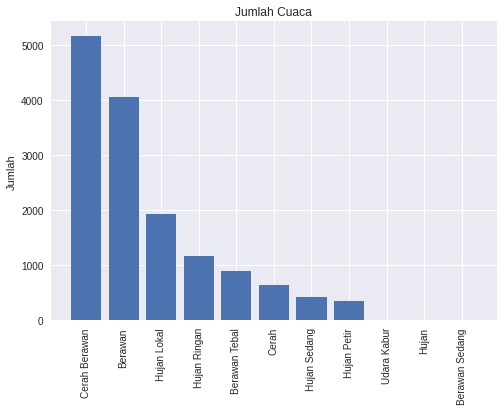

In [ ]:
df_cuaca = df['cuaca'].value_counts()
x_coords = np.arange(len(list(df_cuaca.index)))
plt.bar(x_coords, list(df_cuaca.values), tick_label=list(df_cuaca.index))
plt.xticks(rotation=90)
plt.ylabel('Jumlah')
plt.title('Jumlah Cuaca')
plt.show()

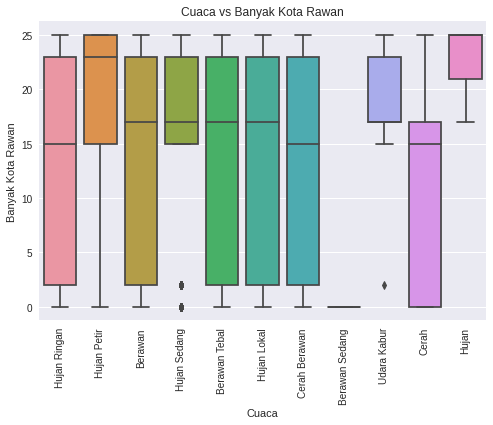

In [ ]:
sns.boxplot(data=df, x='cuaca', y='BanyakKotaRawan')
plt.ylabel("Banyak Kota Rawan")
plt.xlabel("Cuaca")
plt.title('Cuaca vs Banyak Kota Rawan')
plt.xticks(rotation=90)
plt.show()

# **Data Preprocessing - Handling Categorical Values**

Lihat tipe data untuk melihat kolom mana yang perlu ditransformasikan / encode. 

Dapat dilihat dari tipe datanya bahwa semua columns / features adalah object kecuali untuk kolom 'BanyakKotaRawan', yang merupakan data numerical

In [ ]:
df.dtypes

wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen       object
suhu_derajat_celcius    object
BanyakKotaRawan          int64
dtype: object

Encode data kategorikal dengan mengubah nilai di 'diagnosis' masing-masing dari M dan B menjadi 1 dan 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
col_cat = [x for x in df.columns if x != "BanyakKotaRawan"]
col_cat

['wilayah', 'waktu', 'cuaca', 'kelembaban_persen', 'suhu_derajat_celcius']

In [ ]:
for x in col_cat:
  df.loc[:, [x]] = le.fit_transform(df[x])
df

,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,BanyakKotaRawan
0,1,2,8,33,5,2
1,5,1,8,33,5,0
2,3,1,8,33,5,23
3,0,1,8,33,5,17
4,2,1,8,33,5,25
...,...,...,...,...,...,...
14647,2,2,0,38,22,25
14648,0,2,0,38,22,17
14649,3,2,0,38,22,23
14650,0,1,0,38,22,17


In [ ]:
np.unique(df["cuaca"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

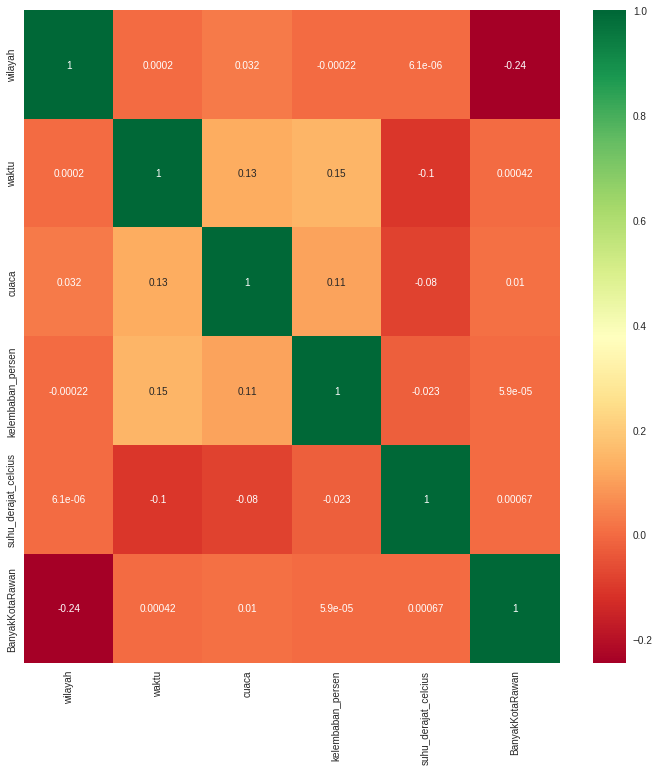

In [ ]:
K = df[col_cat]
j = df["cuaca"]

# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))

# plot heatmap
h = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Data Preprocessing - Split Data**

## **Prepare Feature and Label**

Selanjutnya melakukan spli dataset yang terdiri dari :

* `feature` data set biasa disebut independent data set (X), yakni columns 

* `target` data set also known as the dependent data set (Y) 

In [ ]:
X = df.drop(['cuaca'], axis = 1)
y = df[['cuaca']]

In [ ]:
X

,wilayah,waktu,kelembaban_persen,suhu_derajat_celcius,BanyakKotaRawan
0,1,2,33,5,2
1,5,1,33,5,0
2,3,1,33,5,23
3,0,1,33,5,17
4,2,1,33,5,25
...,...,...,...,...,...
14647,2,2,38,22,25
14648,0,2,38,22,17
14649,3,2,38,22,23
14650,0,1,38,22,17


In [ ]:
y

,cuaca
0,8
1,8
2,8
3,8
4,8
...,...
14647,0
14648,0
14649,0
14650,0


* Aplikasikan library **SelectKBest** untuk mengekstrak fitur terbaik dari dataset

In [ ]:
#Apply SelectKBest class to extract
bestfeature = SelectKBest(score_func=chi2, k=4)
fit = bestfeature.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(X.columns)

* lihat hasil score seleksi feature

In [ ]:
#gabungkan 2 dataframe tersebut untuk visualisasi yang lebih bagus

featureScores = pd.concat([dfcolums, dfscores], axis=1)
featureScores.columns = ['Field', 'Score']
print(featureScores.nlargest(10,'Score'))

                  Field         Score
2     kelembaban_persen  10291.730036
4       BanyakKotaRawan    829.014141
3  suhu_derajat_celcius    610.850489
1                 waktu    473.073945
0               wilayah    102.476566


### Feature Importance (FT)
---
FT berfungsi memberi skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output

FT merupakan kelas inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kita akan menggunakan Pengklasifikasi Pohon Ekstra untuk
mengekstraksi 10 fitur teratas untuk kumpulan data

Tujuan dari **ExtraTreesClassifier** adalah untuk menyesuaikan sejumlah pohon keputusan acak ke data, dan dalam hal ini adalah dari pembelajaran ensemble. Khususnya, pemisahan acak dari semua pengamatan dilakukan untuk memastikan bahwa model tidak terlalu cocok dengan data.

* Aplikasikan library **ExtraTreesClassifier** untuk mengekstrak fitur terbaik dari dataset

In [ ]:
# Import library ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Import library matplotlib
import matplotlib.pyplot as plt 

# fit model ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesClassifier()

* visualisasikan hasil dari model ExtraTreesClassifier

[0.03322109 0.14808488 0.42858352 0.3537882  0.03632231]


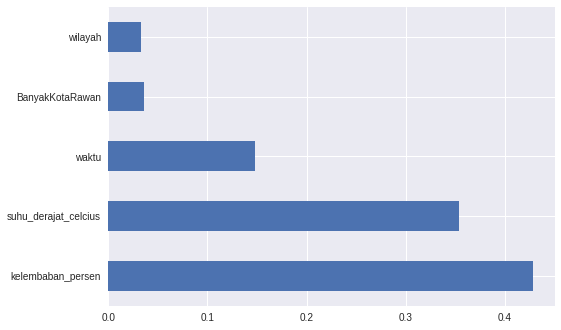

In [ ]:
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

### Matriks Korelasi dengan Heatmap
---
* Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.
* Korelasi bisa positif (kenaikan satu nilai fitur meningkatkan nilai variabel target) atau negatif (kenaikan satu nilai fitur menurunkan nilai variabel target)
* Heatmap memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas fitur yang berkorelasi menggunakan seaborn library

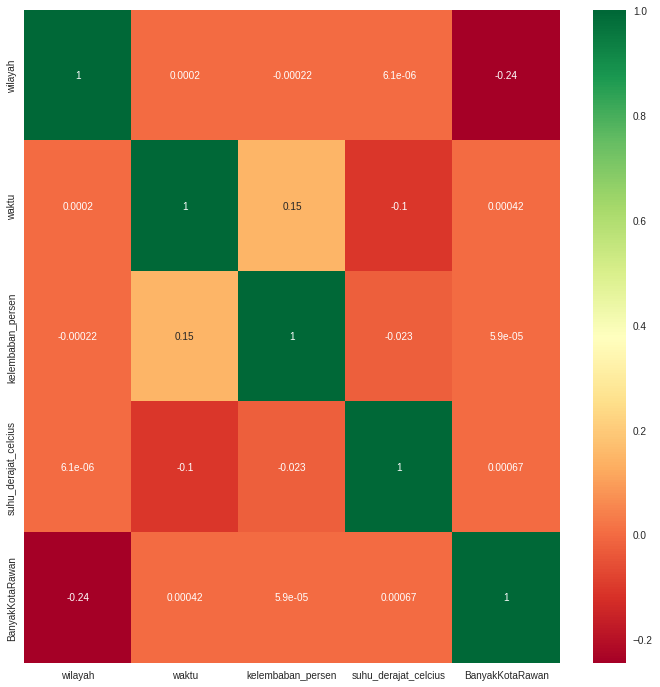

In [ ]:
# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))

# plot heatmap
h = sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Split Data

Memisahkan data untuk training dan testing, tetapi kali ini menjadi 70% kumpulan data training dan 30% testing.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# **Data Preprocessing - Normalize**

Scale the data to bring all features to the same level of magnitude, which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Remove Outlier**

In [ ]:
X = df.drop(['cuaca'], axis = 1)
y = df[['cuaca']]

**Identify Outlier**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)

X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

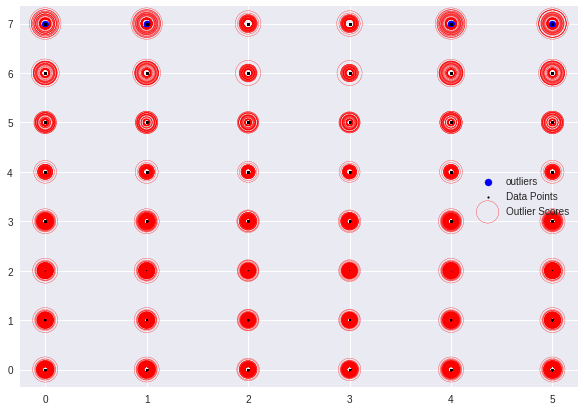

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1],color = "blue", s = 50, label = "outliers")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k", s = 3, label = "Data Points")
radius = (X_score.max()- X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(X.iloc[:,0],X.iloc[:,1],s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend() 
plt.show()

In [ ]:
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

**split data and normalize**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)